# Capstone Two

# Questions

1. Why wont the country name for 2020 be changed to country 
2. Why are the regions and countries not staying consistent in the new dataset
3. graph education spending with top and bottom three happiest countries. is there a pattern?
4. Generally is this a productive way to do things?

# Idea

1.Out of all the variables over the 5 years which features most strongly attributed to a happier country.

2.Broken down by regions of the world over the past 5 years- which features strongly attributed to a happier country- is it different per region?

3.Take happiest 3 countries and least happy 3 countires in the past 4 years and look up datasets for, is there any correlation:

- ethnic diversity
- money spent on education (% of GDP)
- Ratio of men to women
- How many women are in government/Do the happiest countriest have more women or men in positions of power

Keep in mind the least happy nations may not have all the necessary information due to their standing in the world and what leads them to be so low in the ranking.

I would like to gather this infomration for all countries BUT for now is there a great difference between this informatoin in the most happiest and least and is there a correlation of some sort.

# Resources

1. https://storage.googleapis.com/sp-springboard-resources -> look for visualization options etc. 
2. https://docs.google.com/document/d/18TUPV-apS05CcIMk0gmgzSDTXOZZqUcICAoVd91BklU/edit
3. You can also review the EDA work you did for the guided capstone
4. https://aiden-dataminer.medium.com/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9
5. https://storage.googleapis.com/sp-springboard-resources-uploaded-images/uploads/resources/1583439433_EDA_Cheat_Sheet_.pdf

Student Examples
1. https://github.com/tschmalz124/School-Violence-Investigation/blob/master/notebooks/1.0%20-%20EDA%20(Visual).ipynb 
2. https://github.com/chudzikr/Springboard_Capstone1/blob/master/code/EDA_diffdata.ipynb

# Directions

- time to perform exploratory data analysis (EDA)
- Explore the data relationships of all your features and understand how the features compare to the response variable.
- Remember to always start with an idea of what you want to achieve, and use these libraries and their functions as your toolkit to make that idea a reality

- Identify patterns and develop hypotheses.
- Test technical assumptions. Inform model selection and feature engineering.
- Build an intuition for the data.


# Throughout the entire analysis you want to

- Capture a list of hypotheses and questions that come up for further exploration.
- Record things to watch out for/ be aware of in future analyses.
- Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. 
- Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge.
- Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity

# Build data profiles and tables
- Inferential statistics
- Inferential Statistics Hint: do any particular results in your data strike you as abnormal?
What hypotheses can you form (Null and Alternative hypotheses) which you could go on
to test? Take some time to recall your statistical concepts, such as that the p-value of an
observation is the probability of seeing data at least as extreme as that observation, on
the assumption of the null hypothesis.


In [85]:
#Data loading

import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

import pandas as pd
import os
import pickle
import numpy as np 
import json
import statistics

#pip! install plotly
#pip! install cufflinks
#pip list
#pip list | grep plotly

#pip install plotly
!pip install bubbly

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

data_2020= pd.read_csv('2020.csv')

data_2019= pd.read_csv('2019.csv')

data_2018= pd.read_csv('2018.csv')

data_2017= pd.read_csv('2017.csv')

data_2016= pd.read_csv('2016.csv')

data_2015= pd.read_csv('2015.csv')

#df=pd.read_csv('cleaned_data.csv', parse_dates=['date_time'])sns.set(style='ticks')


  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5440 sha256=a41b485d348bd3eddb7f4a0b2111807df20e0075ad22f05393481925cf138639
  Stored in directory: c:\users\allegra grunberg\appdata\local\pip\cache\wheels\f3\a2\b4\e8c5235bb3da5f686d87429eac448bead93e17c7ac0d7cfc2d
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=6241 sha256=08629de6cf8e1cef0ad23c98c111cb0943d55daf091af73e50819fef8169b673
  Stored in directory: c:\users\allegra grunberg\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built bubbly retrying


In [138]:
#add the column "Year" to all datasets

data_2015['Year'] = 2015 
data_2016['Year'] = 2016 
data_2017['Year'] = 2017 
data_2018['Year'] = 2018    
data_2019['Year'] = 2019 
data_2020['Year'] = 2020 

In [139]:
#change columns, Country, Region, Happiness Rank, Happiness Score, GDP, Life Expectancy to be the same in all datasets
#https://www.listendata.com/2020/09/How-to-rename-columns-in-Pandas.html
#call rename () method 
##df.rename(columns={'year':'years', 'month':'months' }, inplace = True)

data_2020.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country name':'Country','Regional indicator':'Region','Ladder score':'Happiness Score','Logged GDP per capita':'GDP', 'Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2019.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country or region':'Country','Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'GDP','Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2018.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country or region':'Country','Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'GDP','Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2017.rename(columns={'Trust..Government.Corruption.':'Trust','Country':'Country','Region':'Region','Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'GDP','Health..Life.Expectancy.':'Life Expectancy'}, inplace = True)
data_2016.rename(columns={'Trust (Government Corruption)':'Trust','Country':'Country','Region':'Region','Happiness Rank':'Happiness Rank','Happiness score':'Happiness Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life Expectancy'}, inplace = True)
data_2015.rename(columns={'Trust (Government Corruption)':'Trust','Country':'Country','Region':'Region','Happiness Rank':'Happiness Rank','Happiness score':'Happiness Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life Expectancy'}, inplace = True)
#2020 doesnt have a "happiness rank column"
#2018 doesnt have a region column same as country


In [140]:
#concatenate data
#resources- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 
    
frames = [data_2020, data_2019, data_2018, data_2017, data_2016, data_2015]
all_happiness_data = pd.concat(frames)

In [141]:
#new dataset info
all_happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 157
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     935 non-null    object 
 1   Region                                      468 non-null    object 
 2   Happiness Score                             935 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   GDP                                         935 non-null    float64
 7   Family                                      935 non-null    float64
 8   Life Expectancy                             935 non-null    float64
 9   Freedom                                     935 non-null    float64
 10  Generosity    

In [142]:
#sort values and count for each variable 
#new dataset info
all_happiness_data.isnull().sum()

Country                                         0
Region                                        467
Happiness Score                                 0
Standard error of ladder score                782
upperwhisker                                  782
lowerwhisker                                  782
GDP                                             0
Family                                          0
Life Expectancy                                 0
Freedom                                         0
Generosity                                      0
Trust                                           1
Ladder score in Dystopia                      782
Explained by: Log GDP per capita              782
Explained by: Social support                  782
Explained by: Healthy life expectancy         782
Explained by: Freedom to make life choices    782
Explained by: Generosity                      782
Explained by: Perceptions of corruption       782
Dystopia + residual                           782


# Adding Edu Data

In [127]:
#Finland
#make a dataframe

fin = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 7.08, 6.90, 6.3]}

fin_edu = pd.DataFrame(data=fin)
    
print(fin_edu)    

   Year  % of GDP Spent On Edu
0  2015                   7.08
1  2016                   6.90
2  2017                   6.30


In [128]:
#Denmark
#make a dataframe

den = {'Year': [2014,2016, 2017], '% of GDP Spent On Edu': [ 7.63, np.nan, 7.82]}

den_edu = pd.DataFrame(data=den)
    
print(den_edu)    

   Year  % of GDP Spent On Edu
0  2014                   7.63
1  2016                    NaN
2  2017                   7.82


In [129]:
#Norway
#make a dataframe

nor = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 7.55, 7.98, 7.91]}

nor_edu = pd.DataFrame(data=nor)
    
print(nor_edu)   

   Year  % of GDP Spent On Edu
0  2015                   7.55
1  2016                   7.98
2  2017                   7.91


In [130]:
#Afghanistan 
#make a dataframe

af = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 3.26, 4.23, 4.06]}

af_edu = pd.DataFrame(data=af)
    
print(af_edu)   

   Year  % of GDP Spent On Edu
0  2015                   3.26
1  2016                   4.23
2  2017                   4.06


In [131]:
#South Sudan
#make a dataframe

ss = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 1.36 , 1.50, 0.98]}

ss_edu = pd.DataFrame(data=ss)
    
print(ss_edu)  

   Year  % of GDP Spent On Edu
0  2015                   1.36
1  2016                   1.50
2  2017                   0.98


In [132]:
#Zimbabwe
#make a dataframe

zim = {'Year': [2014,2016, 2017], '% of GDP Spent On Edu': [ 6.14 , np.nan, 5.82]}

zim_edu = pd.DataFrame(data=zim)
    
print(zim_edu)  

   Year  % of GDP Spent On Edu
0  2014                   6.14
1  2016                    NaN
2  2017                   5.82


# Step 1: Exploring each individual variable

- Basics steps to complete during Step 1

Quantify:
- Location: mean, median, mode, interquartile mean Spread: standard deviation, variance, range,
- interquartile range
- Shape: skewness, kurtosis
- For time series, plot summary statistics over time.
- For panel data:
- Plot cross-sectional summary statistics over time Plot time-series statistics across the population

Questions to consider when working on Step 1:

- What does each field in the data look like?
- Is the distribution skewed? Bimodal? Are there outliers? Are they feasible? Are there
- discontinuities? Are the typical assumptions seen in modeling valid?
- Gaussian
- Identically and independently distributed
- Have one mode
- Can be negative
- Generating processes are stationary and isotropic (time series)
- Independence between subjects (panel data)

In [143]:
#Inferential Statistics 
#Do any particular results in your data strike you as abnormal?
#summary stats table transposed for df
all_happiness_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,935.0,5.394436,1.124935e+00,2.566900,4.540000,5.353500,6.198500,7.808700
Standard error of ladder score,153.0,0.053538,1.818302e-02,0.025902,0.040698,0.050606,0.060677,0.120590
upperwhisker,153.0,5.578175,1.096823e+00,2.628270,4.826248,5.607728,6.363886,7.869766
lowerwhisker,153.0,5.368304,1.128631e+00,2.505530,4.603149,5.430644,6.138881,7.747634
GDP,935.0,2.287264,3.161344e+00,0.000000,0.695145,1.070000,1.395705,11.450681
Family,935.0,1.034264,3.212100e-01,0.000000,0.819085,1.035160,1.281237,1.644000
Life Expectancy,935.0,11.057834,2.379941e+01,0.000000,0.508000,0.708060,0.892350,76.804581
Freedom,935.0,0.472008,2.019615e-01,0.000000,0.337772,0.465820,0.585785,0.974998
Generosity,935.0,0.180425,1.539773e-01,-0.300907,0.098152,0.183000,0.262000,0.838075
Trust,934.0,0.224981,2.549458e-01,0.000000,0.061039,0.110800,0.285300,0.935585


In [ ]:
#Summary

#The lowest happiness score is: 2.566900 which is which country...
#the highest happiness score is: 7.808700 which is which country...

In [95]:
#data correlation;
all_happiness_data.corr().T

,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,Family,Life Expectancy,Freedom,Generosity,Trust,...,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Whisker.high,Whisker.low,Dystopia.Residual,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Standard Error
Happiness Score,1.000000e+00,-4.464433e-01,9.995772e-01,9.996007e-01,1.630692e-01,5.947593e-01,7.402844e-02,4.262913e-01,8.517216e-02,1.201402e-01,...,4.183051e-01,4.802789e-01,-0.992066,0.999497,0.999520,0.475355,0.999485,0.999474,0.526343,-0.177254
Standard error of ladder score,-4.464433e-01,1.000000e+00,-4.202380e-01,-4.715483e-01,-5.789263e-01,-5.158812e-01,-5.864704e-01,-2.924977e-01,7.274192e-02,3.035997e-01,...,-3.035997e-01,1.496833e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upperwhisker,9.995772e-01,-4.202380e-01,1.000000e+00,9.983566e-01,7.674834e-01,7.590122e-01,7.621089e-01,5.894104e-01,7.237907e-02,-4.143315e-01,...,4.143315e-01,4.919065e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lowerwhisker,9.996007e-01,-4.715483e-01,9.983566e-01,1.000000e+00,7.824148e-01,7.702008e-01,7.776683e-01,5.912713e-01,6.574526e-02,-4.218278e-01,...,4.218278e-01,4.685900e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,1.630692e-01,-5.789263e-01,7.674834e-01,7.824148e-01,1.000000e+00,-2.218299e-01,9.904796e-01,7.122836e-01,-5.583396e-01,8.654437e-01,...,3.347291e-01,-6.206306e-02,-0.794791,0.811868,0.812267,0.024226,0.790673,0.789140,0.079411,-0.217651
Family,5.947593e-01,-5.158812e-01,7.590122e-01,7.702008e-01,-2.218299e-01,1.000000e+00,-2.898278e-01,7.815205e-02,1.453228e-01,-2.386603e-01,...,2.105296e-01,-2.800699e-03,-0.644842,0.750934,0.753767,0.070506,0.741523,0.736184,0.053264,-0.120728
Life Expectancy,7.402844e-02,-5.864704e-01,7.621089e-01,7.776683e-01,9.904796e-01,-2.898278e-01,1.000000e+00,6.922260e-01,-5.597455e-01,8.654329e-01,...,3.538412e-01,-3.994777e-02,-0.743655,0.776634,0.786385,0.054963,0.769177,0.760752,0.025248,-0.310287
Freedom,4.262913e-01,-2.924977e-01,5.894104e-01,5.912713e-01,7.122836e-01,7.815205e-02,6.922260e-01,1.000000e+00,-2.124601e-01,6.954680e-01,...,4.201445e-01,6.257126e-02,-0.537942,0.569907,0.569808,0.081926,0.566857,0.566203,0.034829,-0.129773
Generosity,8.517216e-02,7.274192e-02,7.237907e-02,6.574526e-02,-5.583396e-01,1.453228e-01,-5.597455e-01,-2.124601e-01,1.000000e+00,-4.375190e-01,...,2.784802e-01,-2.178495e-02,-0.117713,0.155462,0.154904,-0.116627,0.158025,0.155495,-0.110632,-0.088439
Trust,1.201402e-01,3.035997e-01,-4.143315e-01,-4.218278e-01,8.654437e-01,-2.386603e-01,8.654329e-01,6.954680e-01,-4.375190e-01,1.000000e+00,...,-1.000000e+00,1.785091e-02,-0.372781,0.426459,0.431223,-0.022755,0.404840,0.398775,-0.023504,-0.178325


In [ ]:
#Summary
#What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? 


In [103]:
#Variance
(statistics.variance(all_happiness_data['Happiness Score']))

1.265478068309518

# Step 2: Exploring the relationship between each variable and the target

How does each field interact with the target?Assess each relationship’s:
- Linearity Direction
- Rough size
- Strength

Shape: 
- skewness
- kurtosis

For time series
- plot summary statistics over time

# Questions To Ask
1. Look at featuers that were highest correlated each year for happiness score
2. look at features that were highest correlated over all years with happiness - did this change and why?
3. Which countries have made the biggest shift (happier)/ (sadder) in the past 5 years
4. Broken down by regions of the world over the past 5 years- which features strongly attributed to a happier country- is it different per region?
5. Countries Least and Most Features

*which questions should use which graphing look below*
For time series- plot summary statistics over time


C:\dev\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



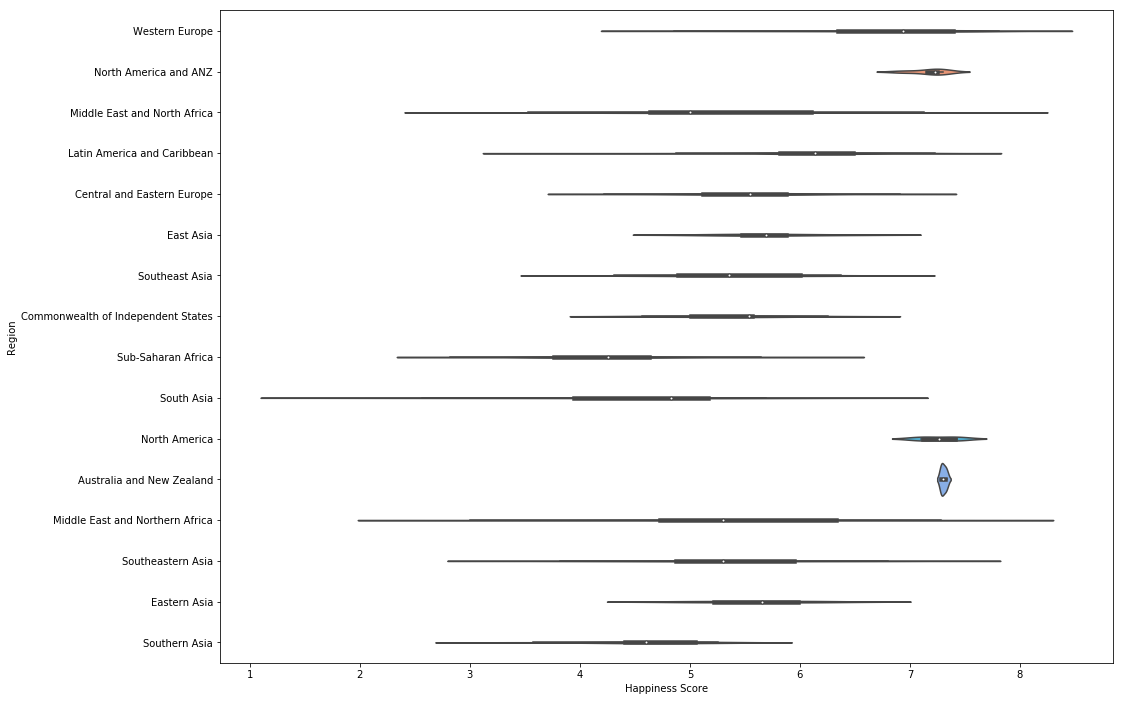

In [154]:
#Viewing Happiness score across 5 years
#candle chart

plt.rcParams['figure.figsize'] = (16, 12)
sns.violinplot(all_happiness_data['Happiness Score'], all_happiness_data['Region'])
plt.show()

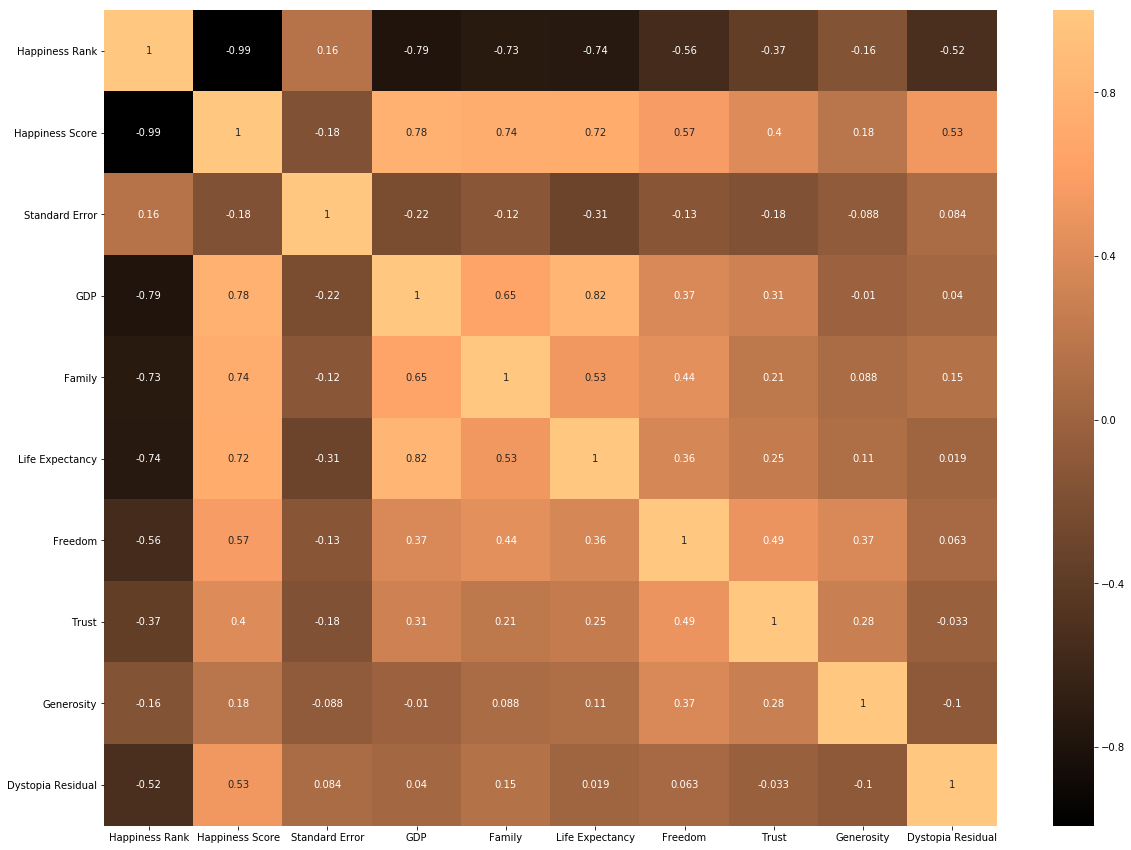

In [115]:
#Question 1
#Look at featuers that were highest correlated each year for happiness #data correlation for all years (2015-2020)
#data_2015.corr().T

plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data_2015.corr(), cmap = 'copper', annot = True)

plt.show()

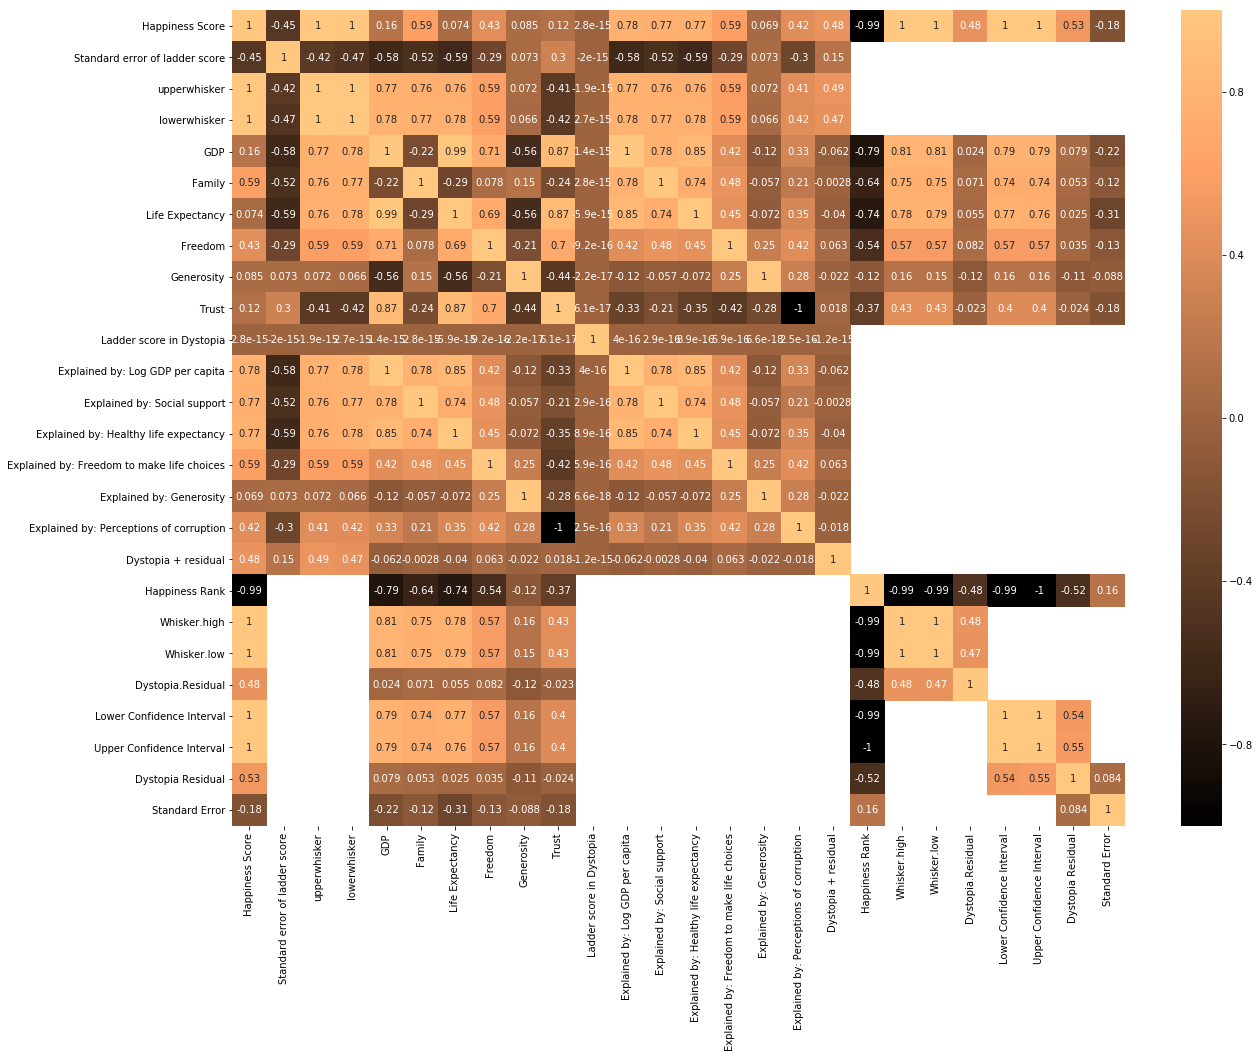

In [109]:
#Question 2
#look at features that were highest correlated over all years with happiness - did this change and why 
#highest correlation with happiness score over the years (2015-2020): GDP, life expectancy, family.#Correlation 
#show correlation heatmap

plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(all_happiness_data.corr(), cmap = 'copper', annot = True)

plt.show()

In [ ]:
#Question 3
#Which countries have made the biggest shift (happier)/ (sadder) in the past 5 years
#all_happiness_data country. happiness score

time series- plot summary statistics over time 

# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left');


series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [152]:
#Lag Plots or Scatter Plots.

from pandas import read_csv
from matplotlib import pyplo

all_happiness_data['Happiness Score'].plot()
                   
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-152-086c9b9557a5>, line 7)

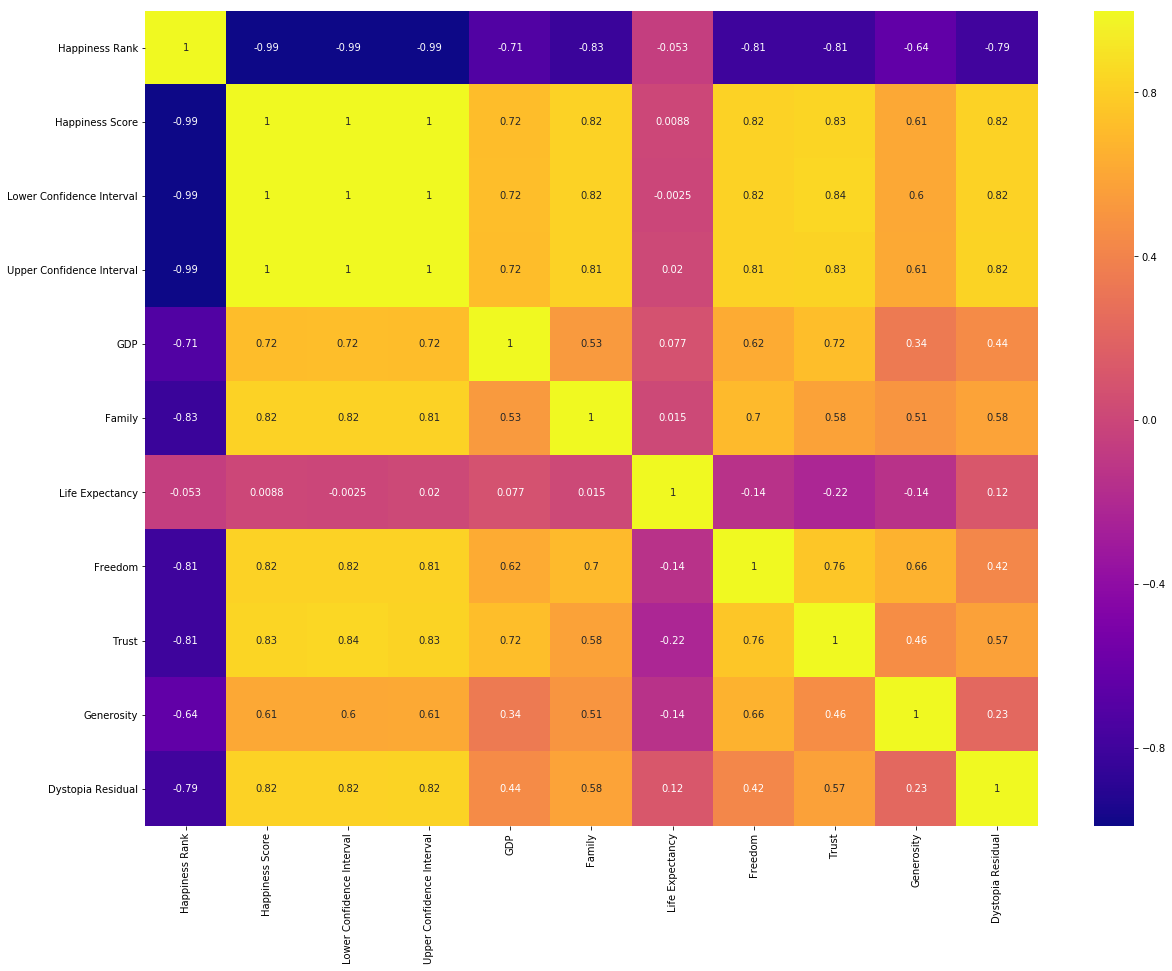

In [133]:
#Question 4
#Broken down by regions of the world over the past 5 years- which features strongly attributed to a happier country?
#is it different per region?


plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'plasma', annot = True)
plt.show()

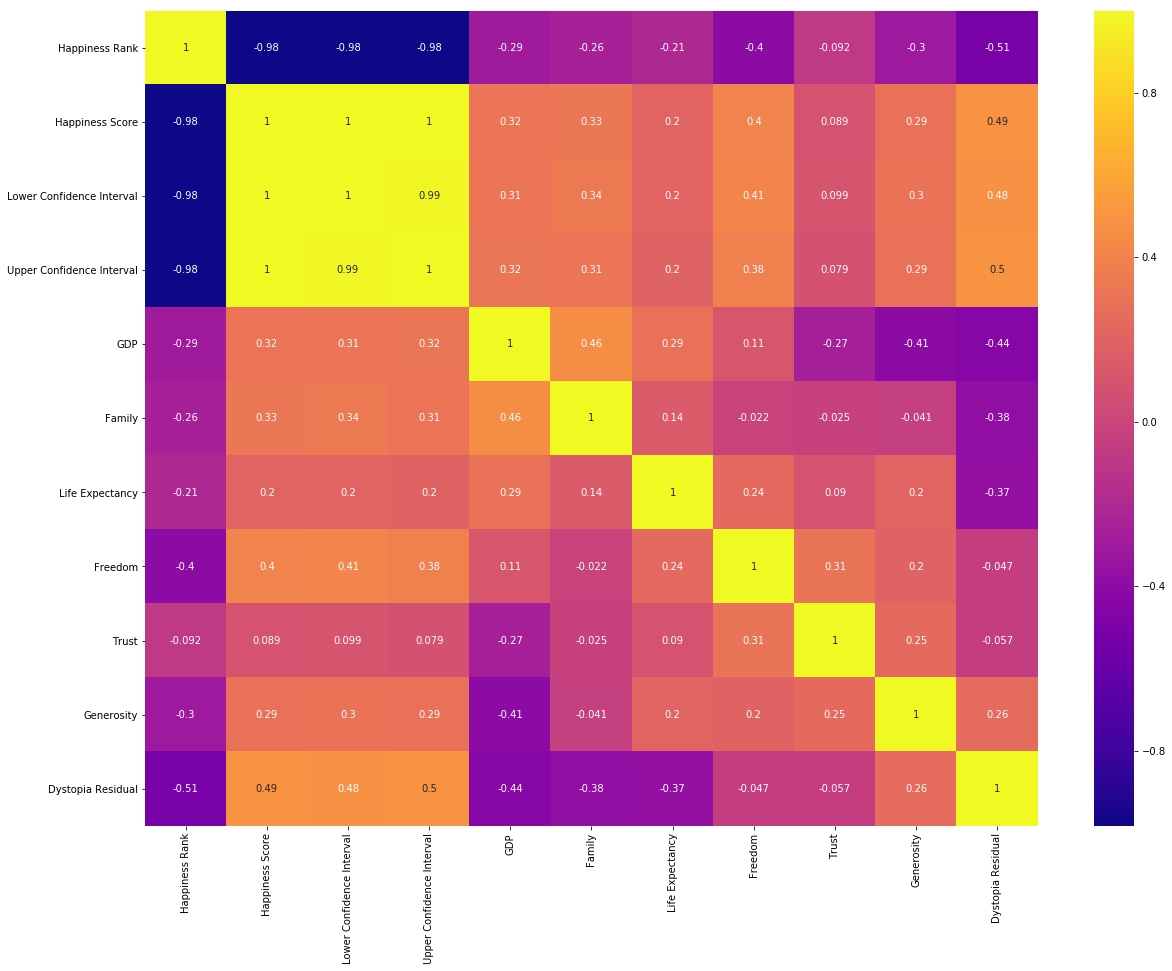

In [135]:
#Broken down by regions of the world over the past 5 years- which features strongly attributed to a happier country?
#is it different per region?


plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'plasma', annot = True)
plt.show()

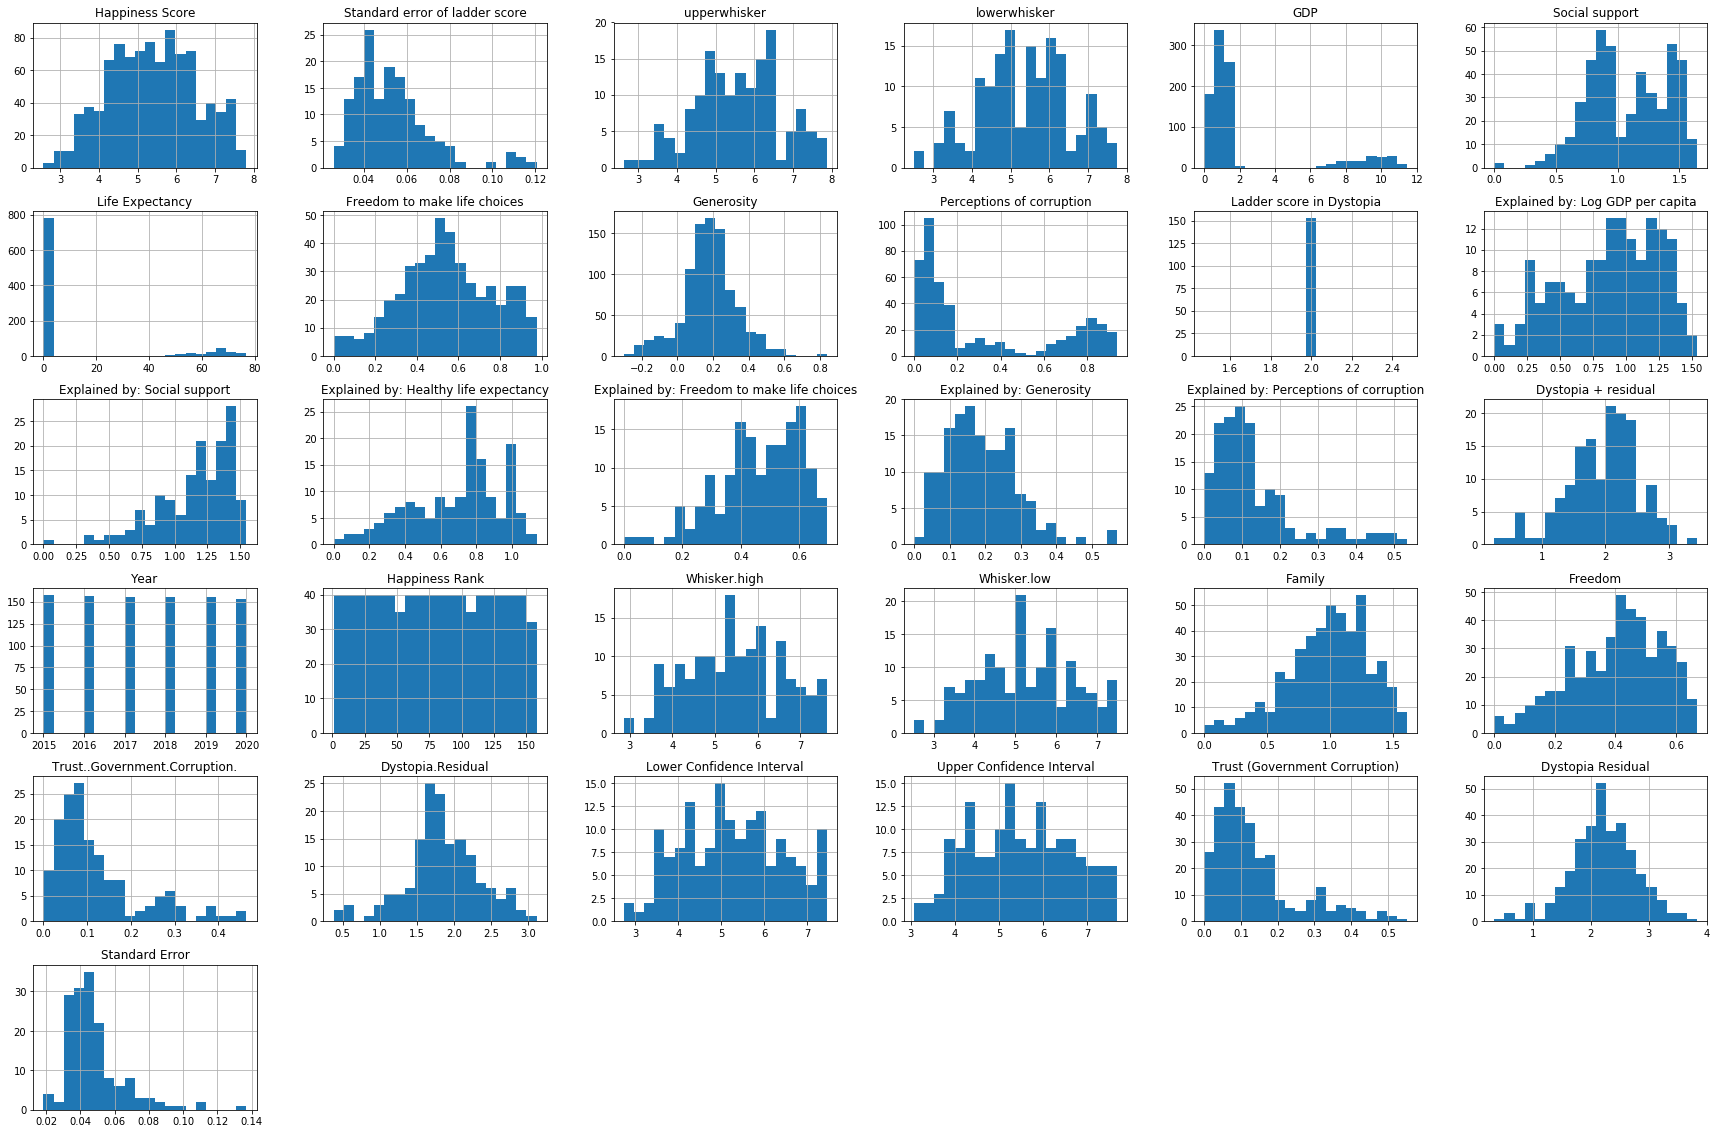

In [64]:
#showcase subplots of each feature over the past 5 years
#histograms for each variable in df
hist = all_happiness_data.hist(bins=20,figsize =(30,20))


In [125]:
#pie chart of all regions

d2015 = all_happiness_data['Region'].value_counts()

label_d2015 = d2015.index
size_d2015 = d2015.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_d2015, values = size_d2015, marker = dict(colors = colors), name = '2015', hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Regions')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

In [120]:
#pie chart of all countries 

import plotly.graph_objs as go


dall = all_happiness_data['Country'].value_counts()

label_dall = dall.index
size_dall = dall.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_d2015, values = size_d2015, marker = dict(colors = colors), name = '2015-2020', hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Country')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

# Country Superlatives 

In [144]:
#which countries are happiest

all_happiness_data[['Country', 'Happiness Score', 'Year']].sort_values(by = 'Happiness Score', ascending = False).head(10)

,Country,Happiness Score,Year
0,Finland,7.8087,2020
0,Finland,7.7690,2019
1,Denmark,7.6456,2020
0,Finland,7.6320,2018
1,Denmark,7.6000,2019
1,Norway,7.5940,2018
0,Switzerland,7.5870,2015
1,Iceland,7.5610,2015
2,Switzerland,7.5599,2020
2,Denmark,7.5550,2018


KeyError: 'Happiness.Score'

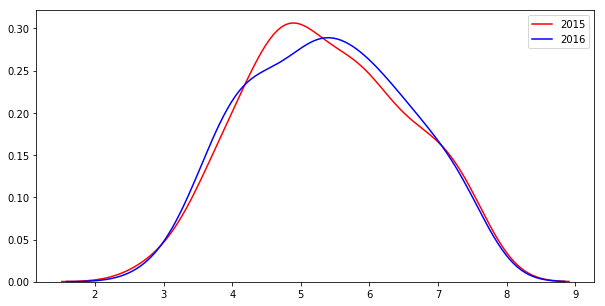

In [165]:
#Happiness Over the Years
#Line Graph

plt.figure(figsize=(10,5))
sns.kdeplot(data_2015['Happiness Score'],color='red', label='2015')
sns.kdeplot(data_2016['Happiness Score'],color='blue', label='2016')
sns.kdeplot(data_2017['Happiness.Score'],color='green', label='2017')
sns.kdeplot(data_2018['Score'],color='orange', label='2018')
sns.kdeplot(data_2019['Score'],color='pink', label='2019')
sns.kdeplot(data_2020['Ladder Score'],color='purple', label='2020')
plt.title('Happiness Over The Years',size=20)
plt.legend()
plt.show()

In [146]:
#which countries are least happy

all_happiness_data[['Country', 'Happiness Score', 'Year']].sort_values(by = 'Happiness Score', ascending = True).head(10)

,Country,Happiness Score,Year
152,Afghanistan,2.5669,2020
154,Central African Republic,2.6930,2017
151,South Sudan,2.8166,2020
157,Togo,2.8390,2015
155,South Sudan,2.8530,2019
153,Burundi,2.9050,2017
156,Burundi,2.9050,2015
155,Burundi,2.9050,2018
156,Burundi,2.9050,2016
155,Syria,3.0060,2015


In [ ]:
#Histogram

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)  (all_happiness_data["Country"]
plt.xlabel('Happiness')
plt.ylabel('Country')
plt.title('Happiness v Country')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [147]:
#which countries are most Generous

all_happiness_data[['Country', 'Generosity', 'Year']].sort_values(by = 'Generosity', ascending = False).head(10)


,Country,Generosity,Year
113,Myanmar,0.838075,2017
118,Myanmar,0.819710,2016
128,Myanmar,0.795880,2015
80,Indonesia,0.611705,2017
129,Myanmar,0.598000,2018
32,Thailand,0.586960,2016
33,Thailand,0.576300,2015
26,Malta,0.574731,2017
31,Thailand,0.572123,2017
130,Myanmar,0.566000,2019


In [161]:
#Bubble chart
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = all_happiness_data, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'GDP', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

IndexError: index 0 is out of bounds for axis 0 with size 0

In [49]:
#which countries trust most

all_happiness_data[['Country', 'Trust (Government Corruption)', 'Year']].sort_values(by = 'Trust (Government Corruption)', ascending = False).head(10)

,Country,Trust (Government Corruption),Year
153,Rwanda,0.55191,2015
27,Qatar,0.52208,2015
151,Rwanda,0.50521,2016
23,Singapore,0.49210,2015
2,Denmark,0.48357,2015
35,Qatar,0.48049,2016
21,Singapore,0.46987,2016
0,Denmark,0.44453,2016
7,Sweden,0.43844,2015
8,New Zealand,0.42922,2015


In [ ]:
#Bar Charts

import matplotlib.pyplot as plt

#all_happiness_data.plot(x="Country", y=["Happiness Score"])

plt.plot(all_happiness_data["Country"], all_happiness_data["Happiness Score"])

New_Colors = ['green','teal']
#plt.bar('Country', 'Happiness Score')
plt.title('Happiest Countries Over 5 Years')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

In [52]:
#which countries trust least

all_happiness_data[['Country', 'GDP', 'Year']].sort_values(by = 'GDP', ascending = False).head(10)

,Country,GDP,Year
154,Central African Republic,0.000000,2017
75,Somalia,0.000000,2016
97,Somalia,0.000000,2018
119,Congo (Kinshasa),0.000000,2015
111,Somalia,0.000000,2019
156,Burundi,0.015300,2015
130,Malawi,0.016040,2015
92,Somalia,0.022643,2017
154,Central African Republic,0.024000,2018
154,Central African Republic,0.026000,2019


In [ ]:
#scatterplot

# Visualizing Edu Data

In [ ]:
#Univariate
#Education spending and happines score for top three/lowest three countries

#scatterplot 
#Seaborn: sns.relplot(), sns.lmplot(), sns.catplot()

#Seaborn
#Another way to evaluate the variable distributions against each other is scatterplot
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'

features = ['Year','Happiness Score', 'Country']

sns.relplot(features, ncol=4, figsize=(15, 15))

In [ ]:
#Correlation between edu data and happiness score and life expectancy
#if theres sometype of correlation between spending in education and in happiness score or life expectancy.

#add all education data to happiness score and life expectancy from all happiness data



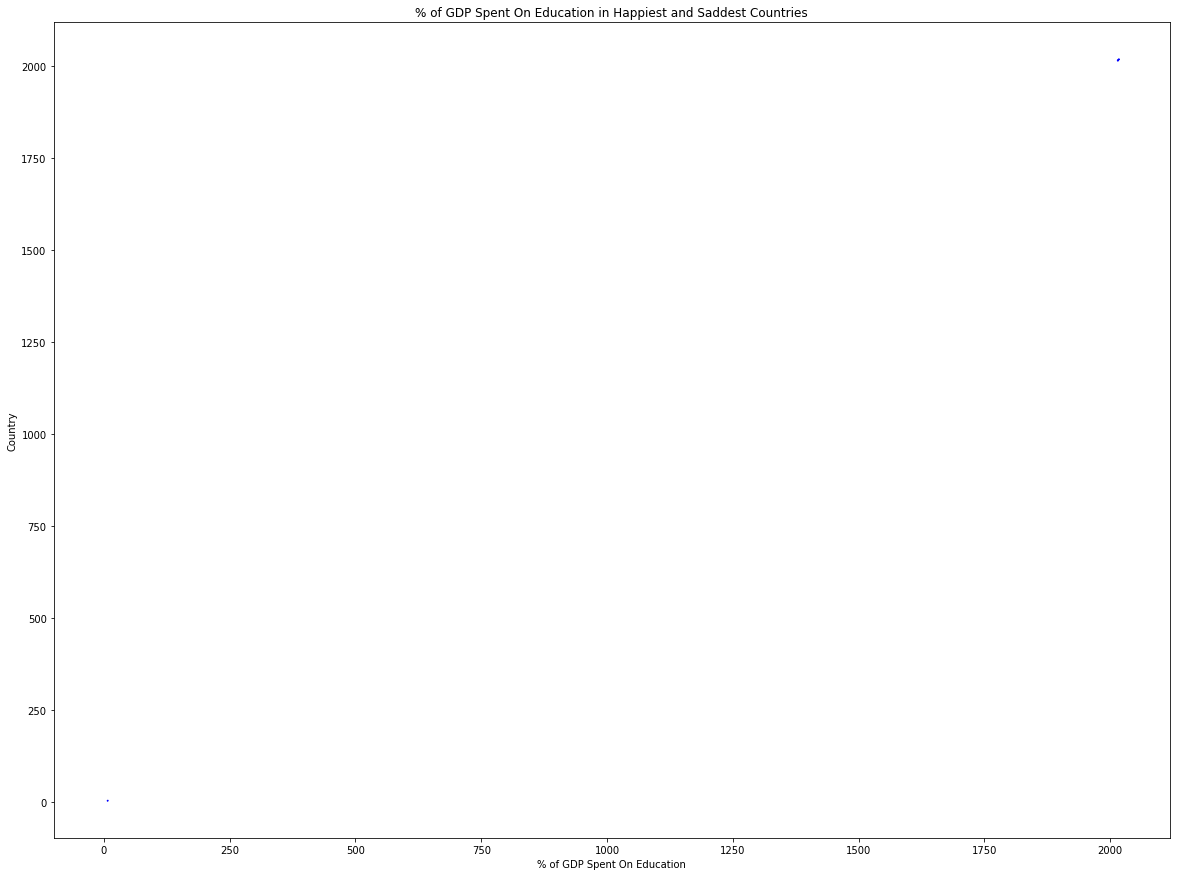

In [149]:
#graph education spending with top and bottom three happiest countries. is there a pattern?

import matplotlib.pyplot as plt

plt.plot(fin_edu,den_edu, nor_edu, af_edu, ss_edu, zim_edu, color='Blue')
plt.xlabel('% of GDP Spent On Education')
plt.ylabel('Country')
plt.title('% of GDP Spent On Education in Happiest and Saddest Countries')
plt.show()

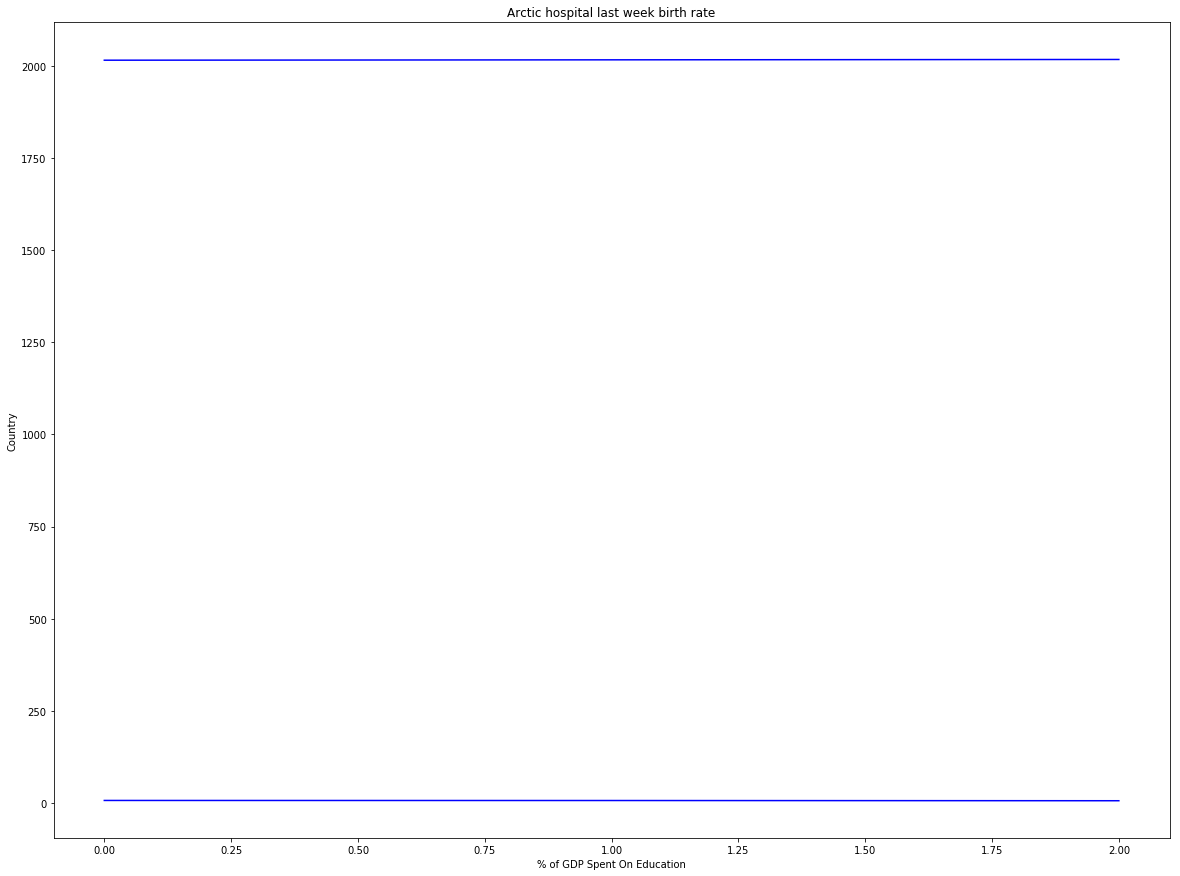

In [150]:
#graph happiness rank against education spending (finland)

plt.plot(fin_edu, color='Blue')
plt.xlabel('% of GDP Spent On Education')
plt.ylabel('Country')
plt.title('Arctic hospital last week birth rate')
plt.show()
                   

# Questions To Answer 

- Are there variables that are particularly significant in terms of explaining the answer to your project question?

Yes, GDP, family, and Life expectancy have a positive correlation with happiness score. The higher these variables the higher the happiness score. I"m also trying to see if theres sometype of correlation between spending in education and in happiness score or life expectancy.


- Are there significant differences between subgroups in your data that may be relevant to your project aim? 

GDP and trust in government varies widely. 

- Are there strong correlations between pairs of independent variables or between

an independent and a dependent variable?

- What are the most appropriate tests to use to analyze these relationships?

Correlation matrix have thus far been the most helpful to vizualize how all the variables interact. 

# Step 3: Assessing interactions between variables

- How do the variables interact with each other?
Bivariate visualizations for all combinations
Correlation matrices
- Compare summary statistics of variable x for different categories of y

# Step 4: Exploring data across many dimensions

- Are there patterns across many of the variables?
Basics steps to complete during Step 4:
Categorical:
Parallel coordinates
Continuous Principal component analysis
Clustering
- Helpful packages
ipywidgets: making function variables interactive for visualizations and calculations
mpld3: interactive visualizations

# Step 5: Feature Selection and Engineering

-Feature Selection and Engineering Hint: feature selection is where data storytelling starts:
we tell a story as soon as we include certain features and omit others. But how we
manipulate - or engineer - those fields is just as important. Recall the crucial elements to
feature engineering:

- If you have categorical features, you might need to one-hot encode them
- You may need to binarize your columns and bin your values.
- To handle missing data, think about how appropriate the methods of listwise deletion, data imputation, replacing missing values with constants or simply attempting to find the missing values are for your data.
- Think about whether you need to standardize, log-transform or normalize your data, as well as statistically valid ways to remove outliers.

Variables and features are almost synonymous. The primary difference tends to be the context in which they are used; in machine learning, it is common practice to identify predictive features in your data whereas in parametric statistics, features are often referred to as variables and variables can include the response variable which you predict with your model.


# Notes

# Trivariate 
x, y, z (contains three axis of information)
- All of the above (in univariate)
- Bubble chart
- Geo Map combined with one of the above
- Tree Map

# Bivariate

x and y (contains two axis of information)
- All of the above
- Area chart
- Histogram

In [ ]:
#Bivariate 
#x and y (contains two axis of information)
#ggplot of happines score and which variables 

g= ggplot(data_2015,aes(x=Freedom,y=Happiness.Score))
g= g+geom_point(aes(colour="red",size=2))
g= g+geom_smooth(method="lm")
g

# Univariate Visualizations

x only (contains only one axis of information) 
- Line charts
- Bar charts
- Stacked bar charts
- Scatter plots
- Percentages
- Candle chart

In [ ]:
#scotter plot 

_ = visualize_plot(happiness_report, "scatter", "Health (Life Expectancy)", "Economy (GDP per Capita)",
                  50, "Happiness Score", True)

<Figure size 720x720 with 0 Axes>

In [ ]:
#Out of all the variables over the 5 years which features most strongly attributed to a happier country.

import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

import pandas as pd
import os
import pickle
import numpy as np 
import json
import statistics


plt.figure(figsize=(10,5))
sns.kdeplot(data_2020['Ladder Score'],color='red', label='2015')
sns.kdeplot(data_2019['Score'],color='blue', label='2016')
sns.kdeplot(data_2018['Score'],color='limegreen', label='2017')
sns.kdeplot(data_2017['Happiness.Score'],color='orange', label='2018')
sns.kdeplot(data_2016['Happiness score'],color='pink', label='2019')
sns.kdeplot(data_2015['Happiness score'],color='pink', label='2019')
plt.title('Happiness Over The Years',size=20)

#plt.legend()
plt.show()

In [ ]:
#which countries show most happy to least happy across world in 2020

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode()


map_happy = dict(type = 'choropleth', 
                 locations = all_happiness_data['Country'], 
                 locationmode = 'country names', 
                 z = all_happiness_data['Happiness Score'], 
                 text = all_happiness_data['Country'], 
                 colorbar = {'title':'Happiness Score'}, 
                 colorscale = 'Viridis')
layout = dict(title = 'Happiness Score Across The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

In [ ]:
#PCA the features-which features are most correlated 
#which feature is most correlated with happiness -which features are most correlated with unhappiness

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [17]:
import seaborn as sns
%matplotlib inline
#import plotly.graph_objs as go
#from plotly.offline import iplot

plt.figure(figsize=(10,5))
sns.kdeplot(data_2015['Happiness Score'],color='red', label='2015')
sns.kdeplot(data_2016['Happiness Score'],color='blue', label='2016')
sns.kdeplot(data_2017['Happiness.Score'],color='limegreen', label='2017')
sns.kdeplot(data_2018['Score'],color='orange', label='2018')
sns.kdeplot(data_2019['Score'],color='pink', label='2019')
sns.kdeplot(data_2020['Ladder score'],color='red', label='2015')
plt.title('Happiness Over The Years',size=20)
plt.legend()
plt.show()

TypeError: 'module' object is not callable

In [ ]:
#matplotlib:

plt.plot()
plt.xlabel()
plt.show()
plt.hist()

#histogram

#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

In [4]:
#Categorical variables require a slightly different approach to review the overall number of each unique value per
#variable and compare them to each other.

#select categorical variables only
df_cat = dataset.select_dtypes(include = 'object').copy()
#get counts of each variable value
df_cat.ColumnName.value_counts()
#count plot for one variable
sns.countplot(data = df_cat, x = 'ColumnName')



#pair plots
g = sns.pairplot(df)

sns.countplot(data=df,
              x='shooting_type')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('School Shooting Type (2010-2018)')
sns.despine()
plt.show()

#subplots

plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

#double boxplot

#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

targ_ind = df.loc[df.shooting_type.str.contains('targeted|indiscriminate'),:]

sns.countplot(targ_ind.date_time.dt.month,
              hue=targ_ind.shooting_type)
plt.xlabel('Month')
plt.ylabel('Frequency')
sns.despine()
plt.legend(loc='upper right')
plt.savefig('month breakdown')
plt.show()

#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for all USA matches
corrmat = usa_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.corr(ski_data.sns.heatmap);


#Create a pairplot for all numeric variables
sns.pairplot(usa_num,  palette='Set1')
plt.show()


#Plot relationship between Poss Time Diff and Passes Diff (show strong correlation to negative strong correlation)
sns.jointplot(x='Passes_Diff', y='Poss_Time_Diff', data=usa_num, kind="reg");


#calculated the correlation coefficients for each variable in the data frame and then fed those correlations 
#into a heatmap for ease of interpretation.

#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

NameError: name 'ski_data' is not defined

In [ ]:
#PCA 

''''Building a Principle Components Analysis (PCA) is a useful way to apply a dimension reduction application to 
identify which features contain the most amount of variation within your development dataset.'''


''''There are different flavors of dimension reduction methods based on multi-dimensional scaling, such as Principal Coordinate Analysis. 
Lasso regression is another tool for a semi-automated feature selection approach. Clustering (e.g. K-means clustering)'''


state_pca = PCA().fit(state_summary_scale)

#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cunsum( ))
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(`state_summary_scale`)

state_pca_x.shape

#It will extract the first and second columns from the transformed data (state_pca_x) as x and y coordinates for plotting. 
#Rthe state labels you saved (for this purpose) for subsequent calls to plt.annotate. Grab the second (index 1) value 
#of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained 
#by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot to convey all of this information.
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

In [3]:
#one hot encode 

#binarize and bin values

#missing values 

#standardize, log transform, normalize (remove outliers)
''''Log: when data is highly skewed (versus normally distributed like a bell curve), sometimes it has
a log-normal distribution and taking the log of each data point will normalize it.
Binning of continuous variables: Binning continuous variables and then analyzing the groups of
observations created can allow for easier pattern identification. Especially with non-linear
relationships.'''

#scaling and changing the index
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index()
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.___
state_summary_scale.head()

#scale
state_summary_scale = scale(state_summary_scale)